# Module 4 Statistical Modeling

## Linear Regression Model

In [2]:
import numpy as np
import pandas as pd

x = np.linspace(-5, 5, 20)
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
data = pd.DataFrame({'x': x, 'y': y})

In [3]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [4]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     114.6
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           3.11e-09
Time:                        16:54:25   Log-Likelihood:                -54.503
No. Observations:                  20   AIC:                             113.0
Df Residuals:                      18   BIC:                             115.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3621      0.870     -7.311      0.000      -8.190      -4.534
x              3.0692      0.287     10.703      0.000       2.467       3.672
==============================================================================
Omnibus:                        1.024   Durbin-Watson:                   2.732
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.965
Skew:                           0.423   Prob(JB):                        0.617
Kurtosis:                       2.336   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

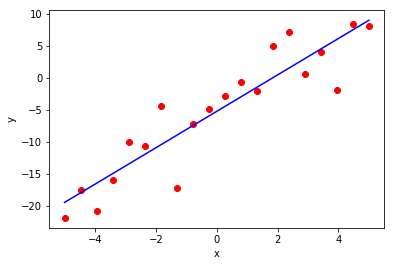

In [13]:
a = model.params[0]
b= model.params[1]

yhat = a + b*x

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y,'or')
plt.plot(x,yhat,'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Ex: Linear Regression Model

In [5]:
import pandas as pd
mtcars = pd.read_csv('./data/mtcars.csv')

In [6]:
model = ols("mpg ~ wt", mtcars).fit()

In [8]:
model.params

Intercept    37.285126
wt           -5.344472
dtype: float64

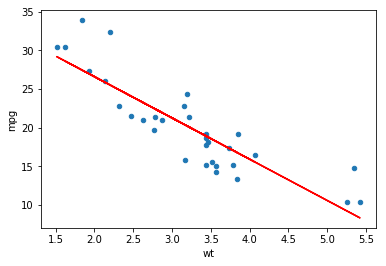

In [117]:
a = model.params[0]
b= model.params[1]

yhat = a + b*mtcars.wt
mtcars.plot.scatter('wt','mpg')
plt.plot(mtcars.wt,yhat,'r')

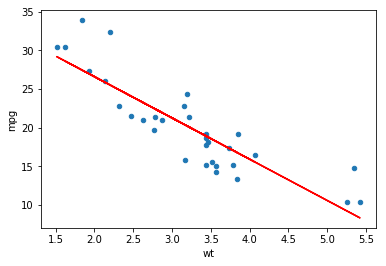

In [118]:
mtcars.plot.scatter('wt','mpg')
plt.plot(mtcars.wt,model.predict(mtcars),'r')

## Multi Regression Model

In [124]:
model = ols("mpg ~ wt+am", mtcars).fit()

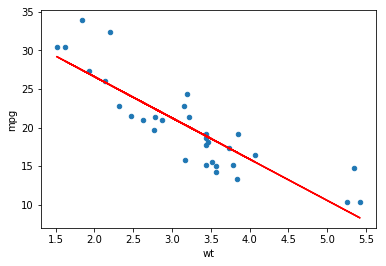

In [125]:
mtcars.plot.scatter('wt','mpg')
plt.plot(mtcars.wt,model.predict(mtcars),'r')

## Ex: Multiple Regression Model

In [80]:
college = pd.read_csv('./data/college.csv')

In [83]:
college.columns

Index(['id', 'name', 'city', 'state', 'region', 'highest_degree', 'control',
       'gender', 'admission_rate', 'sat_avg', 'undergrads', 'tuition',
       'faculty_salary_avg', 'loan_default_rate', 'median_debt', 'lon', 'lat'],
      dtype='object')

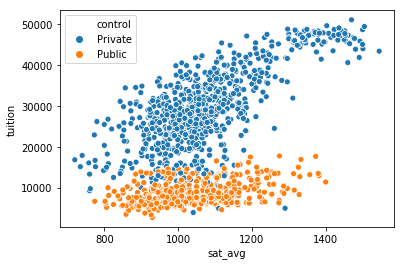

In [85]:
import seaborn as sns
sns.scatterplot('sat_avg','tuition',hue='control',data=college)

In [87]:
model = ols('tuition ~ sat_avg+control', college).fit()

In [92]:
model.params

Intercept           -10194.878929
control[T.Public]   -19108.975916
sat_avg                 36.657748
dtype: float64

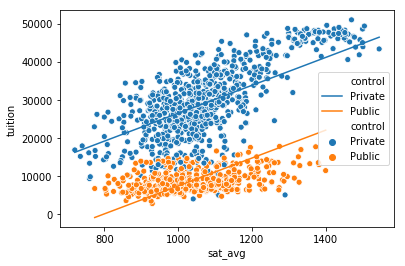

In [91]:
sns.scatterplot('sat_avg','tuition',hue='control',data=college)
sns.lineplot('sat_avg',model.predict(college),hue='control',data=college)

## Goodness of Fit

## Residues

In [129]:
model1 = ols('mpg ~ hp', mtcars).fit()
model2 = ols('mpg ~ hp+wt', mtcars ).fit()

In [130]:
print(model1.mse_resid,model2.mse_resid)

14.922477118153392 6.725784646257453


In [131]:
print(model1.rsquared,model2.rsquared)

0.602437341423934 0.8267854518827914


In [132]:
print(model1.fvalue,model2.fvalue)

45.4598032608238 69.21121339177772


In [ ]:
model1.summary()

In [ ]:
model2.summary()

## Ex: Goodness of Fit Exercise

In [102]:
model1 = ols('tuition ~ sat_avg', college).fit()
model2 = ols('tuition ~ sat_avg+control', college).fit()

In [103]:
print(model1.mse_resid,model2.mse_resid)

120731439.35290547 34485893.95175467


In [105]:
print(model1.rsquared,model2.rsquared)

0.23357912238459044 0.7812512764710577


In [106]:
print(model1.fvalue,model2.fvalue)

386.1386826805379 2260.7311714929797


In [107]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tuition   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     386.1
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           2.99e-75
Time:                        13:53:05   Log-Likelihood:                -13607.
No. Observations:                1269   AIC:                         2.722e+04
Df Residuals:                    1267   BIC:                         2.723e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.727e+04   2476.769    -11.009      0.000   -3.21e+04   -2.24e+04
sat_avg       45.5784      2.319     19.650      0.000      41.028      50.129
==============================================================================
Omnibus:                      736.336   Durbin-Watson:                   1.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.334
Skew:                          -0.113   Prob(JB):                     7.22e-17
Kurtosis:                       1.836   Cond. No.                     8.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tuition   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     2261.
Date:                Mon, 28 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:53:15   Log-Likelihood:                -12812.
No. Observations:                1269   AIC:                         2.563e+04
Df Residuals:                    1266   BIC:                         2.564e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.019e+04   1358.004     -7.507      0.000   -1.29e+04   -7530.693
control[T.Public] -1.911e+04    339.417    -56.299      0.000   -1.98e+04   -1.84e+04
sat_avg              36.6577      1.250     29.333      0.000      34.206      39.110
==============================================================================
Omnibus:                      102.070   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.084
Skew:                          -0.601   Prob(JB):                     1.73e-35
Kurtosis:                       4.258   Cond. No.                     8.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## AVONA

In [166]:
import statsmodels.api as sm
chickwts = sm.datasets.get_rdataset("chickwts").data

In [167]:
chickwts

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean
5,168,horsebean
6,108,horsebean
7,124,horsebean
8,143,horsebean
9,140,horsebean


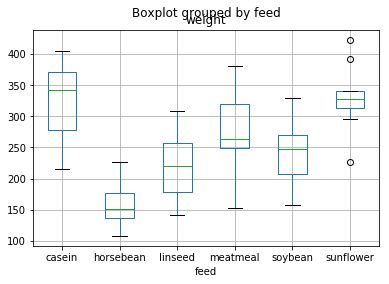

In [170]:
chickwts.boxplot('weight','feed')

In [168]:
model = ols('weight ~ feed', chickwts).fit()

In [ ]:
from statsmodels.stats.api import anova_lm

In [169]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
feed,5.0,231129.162103,46225.832421,15.3648,5.936420e-10
Residual,65.0,195556.020996,3008.554169,NaN,NaN


## Ex ANOVA

In [174]:
model = ols('tuition ~ region', college).fit()

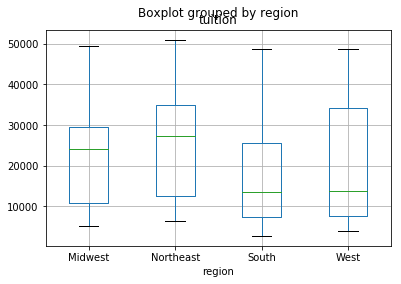

In [176]:
college.boxplot('tuition','region')

In [177]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
region,3.0,1.240011e+10,4.133370e+09,27.933294,1.719599e-17
Residual,1265.0,1.871857e+11,1.479729e+08,NaN,NaN


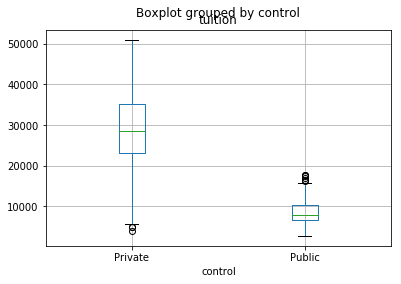

In [178]:
college.boxplot('tuition','control')

In [179]:
model = ols('tuition ~ control', college).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
control,1.0,1.262551e+11,1.262551e+11,2181.423086,9.464090e-278
Residual,1267.0,7.333068e+10,5.787741e+07,NaN,NaN
